In [38]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
from allison.clustering.k_means import Kmeans

In [40]:
data=pd.read_csv("../data/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [41]:
data['labels'] = data.Species.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,labels
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


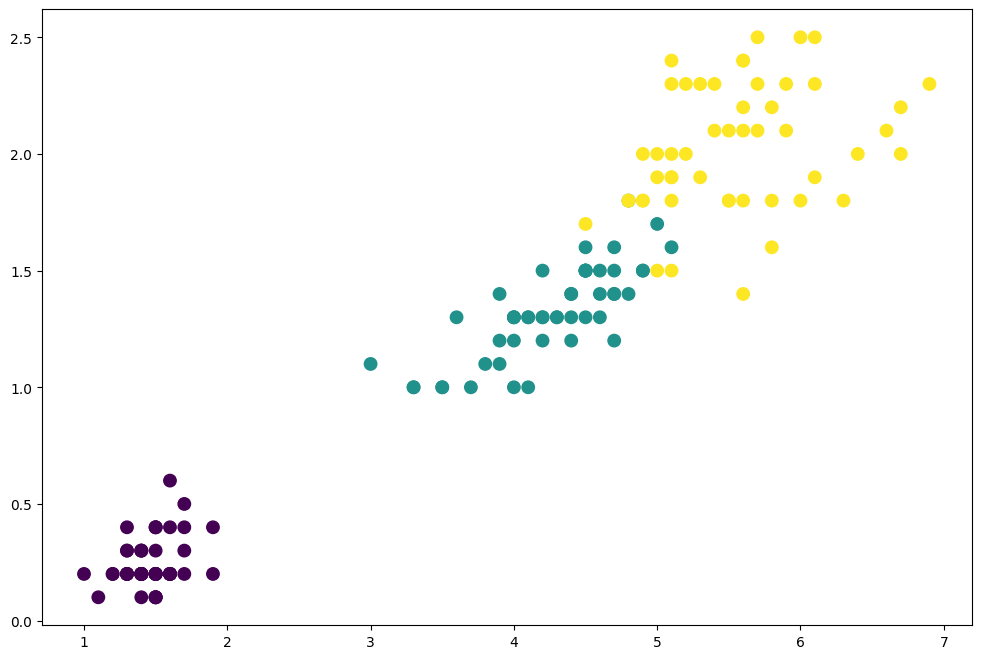

In [42]:
plt.figure(figsize=(12,8))
plt.scatter(data['PetalLengthCm'],data['PetalWidthCm'],s=80, c=data['labels'])

In [43]:
X=data[['PetalLengthCm','PetalWidthCm','PetalLengthCm','PetalWidthCm']]
X

,PetalLengthCm,PetalWidthCm,PetalLengthCm,PetalWidthCm
0,1.4,0.2,1.4,0.2
1,1.4,0.2,1.4,0.2
2,1.3,0.2,1.3,0.2
3,1.5,0.2,1.5,0.2
4,1.4,0.2,1.4,0.2
...,...,...,...,...
145,5.2,2.3,5.2,2.3
146,5.0,1.9,5.0,1.9
147,5.2,2.0,5.2,2.0
148,5.4,2.3,5.4,2.3


In [44]:
model= Kmeans(n_centroids=3)
model.train(X,history_train=True)

Iter: 1 	 ==================================================> 	 moviment: 1.207
Iter: 2 	 ==================================================> 	 moviment: 0.674
Iter: 3 	 ==================================================> 	 moviment: 0.138
Iter: 4 	 ==================================================> 	 moviment: 0.029
Iter: 5 	 ==================================================> 	 moviment: 0.014
Iter: 6 	 ==================================================> 	 moviment: 0.015
Iter: 7 	 ==================================================> 	 moviment: 0.000


In [45]:
pred_labels = model.predict(X)

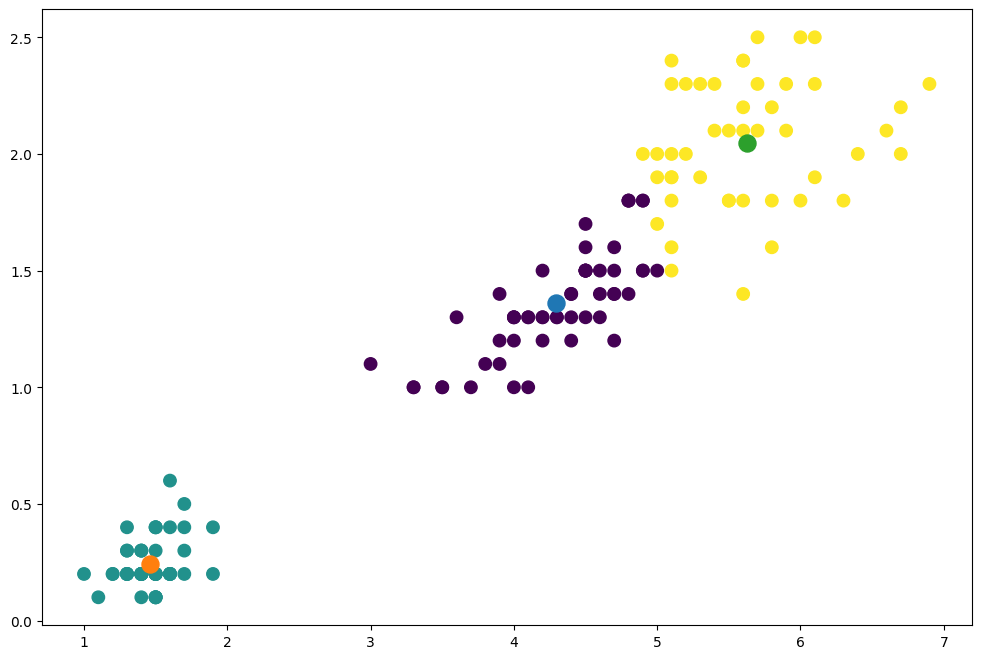

In [46]:
plt.figure(figsize=(12,8))
plt.scatter(data['PetalLengthCm'],data['PetalWidthCm'],s=80, c=pred_labels)

for centroid in model.centroids:
    plt.scatter(centroid[0],centroid[1], s=150)

In [47]:
history=model.history_train
history

{0: array([[4.7, 1.4, 4.7, 1.4],
        [4.4, 1.4, 4.4, 1.4],
        [5.1, 1.6, 5.1, 1.6]]),
 1: array([[4.67777778, 1.41111111, 4.67777778, 1.41111111],
        [2.57356322, 0.68275862, 2.57356322, 0.68275862],
        [5.51481481, 1.99444444, 5.51481481, 1.99444444]]),
 2: array([[4.43076923, 1.40576923, 4.43076923, 1.40576923],
        [1.63272727, 0.31454545, 1.63272727, 0.31454545],
        [5.66511628, 2.07906977, 5.66511628, 2.07906977]]),
 3: array([[4.34310345, 1.38275862, 4.34310345, 1.38275862],
        [1.464     , 0.244     , 1.464     , 0.244     ],
        [5.68333333, 2.08095238, 5.68333333, 2.08095238]]),
 4: array([[4.31964286, 1.36785714, 4.31964286, 1.36785714],
        [1.464     , 0.244     , 1.464     , 0.244     ],
        [5.65227273, 2.06818182, 5.65227273, 2.06818182]]),
 5: array([[4.30727273, 1.36181818, 4.30727273, 1.36181818],
        [1.464     , 0.244     , 1.464     , 0.244     ],
        [5.63777778, 2.06      , 5.63777778, 2.06      ]]),
 6: array(

# Kmeans Animation

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))


# Update function for the animation
def update(i):
    ax.clear()  # Clear the axis

    model.centroids = history[i]
    pred_labels = model.predict(X)
    ax.scatter(data['PetalLengthCm'], data['PetalWidthCm'], s=80, c=pred_labels)

    for centroid in model.centroids:
        ax.scatter(centroid[0], centroid[1], s=150)


plt.close()

# Create the animation
ani = FuncAnimation(fig, update, frames=len(history), repeat=False)
# Display the animation
HTML(ani.to_jshtml())

In [49]:
model.get_distances(X)

array([[4.40703391, 0.10983624, 6.52292453],
       [4.40703391, 0.10983624, 6.52292453],
       [4.53861046, 0.2401333 , 6.65274223],
       [4.27608592, 0.080399  , 6.39359911],
       [4.40703391, 0.10983624, 6.52292453],
       [3.90940269, 0.40007999, 6.02154293],
       [4.35640266, 0.12026637, 6.46756631],
       [4.27608592, 0.080399  , 6.39359911],
       [4.40703391, 0.10983624, 6.52292453],
       [4.33227591, 0.20991427, 6.45269247],
       [4.27608592, 0.080399  , 6.39359911],
       [4.14582607, 0.20214846, 6.26479647],
       [4.46157501, 0.22285421, 6.5808567 ],
       [4.85353095, 0.55359191, 6.96842731],
       [4.67076246, 0.37850231, 6.78302396],
       [4.17582368, 0.22641555, 6.28329919],
       [4.44427469, 0.32009998, 6.54680978],
       [4.35640266, 0.12026637, 6.46756631],
       [3.96069856, 0.34302187, 6.07767304],
       [4.22388531, 0.09414882, 6.33711127],
       [4.0163213 , 0.33950552, 6.13654953],
       [4.17582368, 0.22641555, 6.28329919],
       [4.

In [50]:
inertias = []

for i in range(2,11):
    model = Kmeans(n_centroids=i)
    model.train(X, history_train=False)
    inertias.append(model.get_inertia(X))

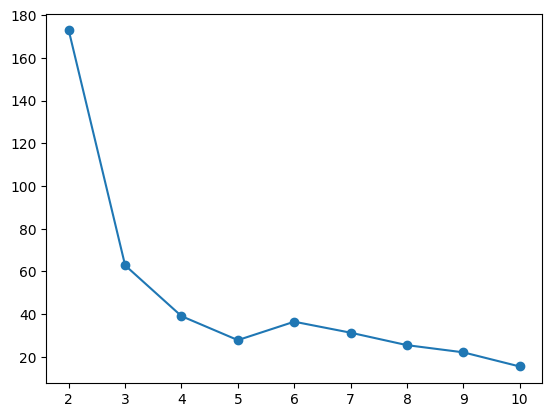

In [51]:
import matplotlib.pyplot as plt
plt.plot(range(2,11), inertias, marker='o')